In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Reading the data file
df = pd.read_csv("./gdrive/MyDrive/IoT Project Backup/Machine Learning Model/heart.csv")

# First 5 rows of the dataset
df.head()

Mounted at /content/gdrive


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [41]:
# Get x, y
y = df.target.values
x_data = df.drop(['target'], axis=1)

# Normalize x
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


# K-Nearest Neighbour (KNN) Classification

In [42]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)   # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("k = {} ==> NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

k = 2 ==> NN Score: 98.05%


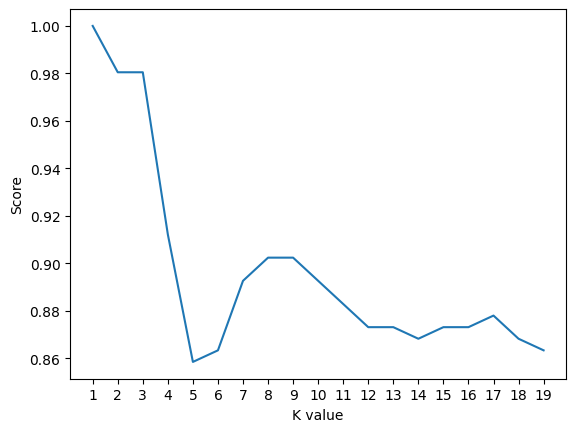

Maximum KNN Score is 100.00%


In [43]:
# Find the best k value
scoreList = []
for i in range(1, 20):
  knn2 = KNeighborsClassifier(n_neighbors = i)    # n_neighbors means k
  knn2.fit(x_train.T, y_train.T)
  scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

# Read and Write Data from ThingSpeak

In [48]:
# Read heart rate and SpO2 level from ThingSpeak
import requests

channel_id = 2147980
read_key = 'O2JS76C4MANU1ZZM'
num_entries = 20

get_url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json?api_key={read_key}&results={num_entries}'

response = requests.get(get_url)
data = response.json()

# Calculate the highest heart rate and average SpO2 level
maxHeartRate = -1
avgSpo2 = 0

if 'feeds' in data:
  feeds = data['feeds']
  for feed in feeds:
    if (int(feed['field1']) > maxHeartRate):
      maxHeartRate = int(feed['field1'])
    avgSpo2 += int(feed['field2'])
  avgSpo2 /= len(feeds)
  print(f'Highest heart rate: {maxHeartRate}')
  print(f'Average SpO2 level: {avgSpo2}')
else:
  print('No data available on ThingSpeak.')

TypeError: ignored

In [23]:
# Read other indicators from ThingSpeak
import requests

# Other indicators in the 'IoT Project' channel
channel_id = 2147980
read_key = 'O2JS76C4MANU1ZZM'
num_entries = 1
get_url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json?api_key={read_key}&results={num_entries}'

response = requests.get(get_url)
data = response.json()

if 'feeds' in data:
  feeds = data['feeds']
  for feed in feeds:
    age = int(feed['field3'])
    sex = int(feed['field4'])
    cp = int(feed['field5'])
    tresbps = int(feed['field6'])
    chol = int(feed['field7'])
else:
  print('No data available on ThingSpeak.')

# Other indicators in the 'Other Indicators' channel
channel_id = 2161115
read_key= 'RWJQ2E8T2RBZ7ELF'
get_url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json?api_key={read_key}&results={num_entries}'

response = requests.get(get_url)
data = response.json()

# Other indicators
if 'feeds' in data:
  feeds = data['feeds']
  for feed in feeds:
    fbs = int(feed['field1'])
    restecg = int(feed['field2'])
    exang = int(feed['field3'])
    oldpeak = float(feed['field4'])
    slope = int(feed['field5'])
    ca = int(feed['field6'])
    thal = int(feed['field7'])
else:
  print('No data available on ThingSpeak.')

In [39]:
# Use real model into the KNN model
sample = [[age, sex, cp, tresbps, chol, fbs, restecg, maxHeartRate, exang, oldpeak, slope, ca, thal]]

model_input = np.array(sample)

# Prediction
prediction = knn.predict(model_input)

result = prediction[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Write prediction result onto ThingSpeak
channel_id = 2160201
write_key = '18MUTQI1CSB613UV'

write_url = f'https://api.thingspeak.com/update.json?api_key={write_key}&field1={result}&field2={avgSpo2}'

response = requests.get(write_url)
if response.status_code == 200:
    print('Data written successfully.')
else:
    print('Failed to write data.')

Data written successfully.
